# CREDIT CARD SPEND PREDICTION & IDENTIFY DRIVERS FOR SPEND

### The objective of this case study is to understand what's driving the total spend

#### Importing Required Modules and Sub Modules

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn import metrics



import statsmodels.api as sm
from sklearn import metrics


from sklearn.linear_model import LinearRegression


### Data Set import

In [2]:
credits = pd.read_excel("C:\\Users\\Vedant\\Downloads\\pyth\\Data_Set.xlsx")

In [3]:
credits.head(2)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0


## Data Preprocessing

In [4]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [6]:
#getting size and shape of our dataframe
credits.size
credits.shape

(5000, 130)

In [7]:
#Since Cust Id is irrelevant and of no use in modelling we can drop it
credits.drop(['custid'],axis=1,inplace=True)

In [405]:
credits.head(2)

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,20,2,September,15,3,1,1,...,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,22,2,May,17,4,2,0,...,1,1,1,1,1,1,1,0,0,0


In [8]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 129 entries, region to response_03
dtypes: float64(31), int64(97), object(1)
memory usage: 4.9+ MB


In [407]:
credits.columns

Index(['region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth', 'ed',
       'edcat', 'jobcat', 'union',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=129)

In [9]:
#our dependent y variable will be sum of the two y variables i.e. cardspent and card2spent
credits['Total_Spend']= credits['cardspent'] + credits['card2spent']

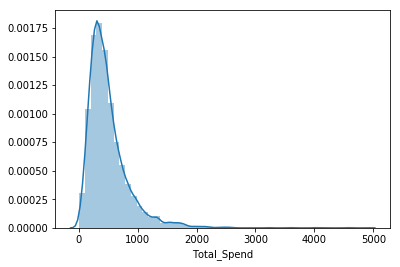

In [10]:
#Verify the normal disribution of Total_Spend
sns.distplot(credits.Total_Spend)

In [11]:
#Since it is not normally distributed , to make it normally distributed we will take the log

In [12]:
credits["ln_Total_Spend"]= np.log(credits["Total_Spend"]+1)

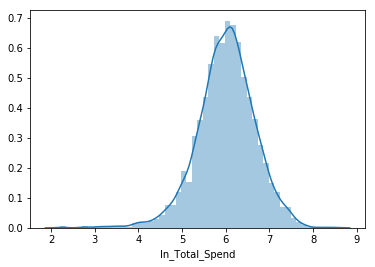

In [13]:
sns.distplot(credits.ln_Total_Spend)

In [14]:
#Now we need to drop existing variables i.e. cardspent, card2spent and Total_Spend and keep only ln_Total_Spend

In [15]:
credits.drop(['cardspent','card2spent','Total_Spend'],axis=1,inplace=True)

In [16]:
credits.shape

(5000, 128)

In [17]:
NA = credits.isnull().sum()

In [18]:
type(NA)

pandas.core.series.Series

In [19]:
#missings
# Dropped variables in which more than 50% values are missing
NA = credits.isnull().sum()
totalx=5000.00
for var in NA.index:
    m = NA[var]/totalx
    m = m*100
    if m>50.00:
        print (var,m)
        credits.drop(var,axis=1,inplace=True)
        


lntollmon 52.44
lntollten 52.44
lnequipmon 65.92
lnequipten 65.92
lnwiremon 73.11999999999999
lnwireten 73.11999999999999


In [418]:
#Above variables are dropped

In [20]:
credits.shape

(5000, 122)

In [21]:
# Numerical and Categorical variables selection
#categorical features
categor_var = ['region','townsize','agecat','edcat','empcat','inccat','jobsat','spousedcat',
         'hometype','addresscat','cars','carown','cartype','carcatvalue',
         'carbought','commutecat','reason','polview','card','cardtype','cardbenefit',
         'cardtenurecat','card2','card2type','card2benefit','card2tenurecat',
         'bfast','internet','birthmonth','jobcat']


In [22]:
#since rest of the variables will be our numerical features

In [23]:
numerical_var = credits.columns.difference( ['region','townsize','agecat','edcat','empcat','inccat','jobsat','spousedcat',
         'hometype','addresscat','cars','carown','cartype','carcatvalue',
         'carbought','commutecat','reason','polview','card','cardtype','cardbenefit',
         'cardtenurecat','card2','card2type','card2benefit','card2tenurecat',
         'bfast','internet','birthmonth'] )

In [24]:
numerical_var

Index(['active', 'address', 'age', 'callcard', 'callid', 'callwait', 'carbuy',
       'card2fee', 'card2tenure', 'cardfee', 'cardmon', 'cardten',
       'cardtenure', 'carvalue', 'churn', 'commute', 'commutebike',
       'commutebus', 'commutecar', 'commutecarpool', 'commutemotorcycle',
       'commutenonmotor', 'commutepublic', 'commuterail', 'commutetime',
       'commutewalk', 'confer', 'creddebt', 'debtinc', 'default', 'ebill',
       'ed', 'employ', 'equip', 'equipmon', 'equipten', 'forward', 'gender',
       'homeown', 'hourstv', 'income', 'jobcat', 'ln_Total_Spend', 'lncardmon',
       'lncardten', 'lncreddebt', 'lninc', 'lnlongmon', 'lnlongten',
       'lnothdebt', 'longmon', 'longten', 'marital', 'multline', 'news',
       'othdebt', 'owncd', 'owndvd', 'ownfax', 'owngame', 'ownipod', 'ownpc',
       'ownpda', 'owntv', 'ownvcr', 'pager', 'pets', 'pets_birds', 'pets_cats',
       'pets_dogs', 'pets_freshfish', 'pets_reptiles', 'pets_saltfish',
       'pets_small', 'polcontrib', 

In [25]:
credits_num=credits[numerical_var]
credits_num.head(5)

,active,address,age,callcard,callid,callwait,carbuy,card2fee,card2tenure,cardfee,...,tenure,tollfree,tollmon,tollten,union,voice,vote,wireless,wiremon,wireten
0,0,0,20,1,0,1,0,0,3,0,...,5,1,29.0,161.05,1,1,1,0,0.00,0.00
1,1,2,22,1,1,0,0,0,4,0,...,39,0,0.0,0.00,0,1,0,1,45.65,1683.55
2,0,30,67,1,0,0,1,0,25,0,...,65,0,0.0,0.00,0,0,0,0,0.00,0.00
3,1,3,23,1,0,0,1,0,5,0,...,36,0,0.0,0.00,0,0,0,0,0.00,0.00
4,1,3,26,1,1,1,1,0,9,0,...,21,1,16.5,387.70,0,1,0,1,19.05,410.80


In [26]:
credits_cat=credits[categor_var]
credits_cat.head(5)

,region,townsize,agecat,edcat,empcat,inccat,jobsat,spousedcat,hometype,addresscat,...,cardbenefit,cardtenurecat,card2,card2type,card2benefit,card2tenurecat,bfast,internet,birthmonth,jobcat
0,1,2.0,2,3,1,2,1,-1,2,1,...,1,2,5,3,1,2,3,0,September,1
1,5,5.0,2,4,1,1,1,-1,3,1,...,1,2,4,1,3,2,1,4,May,2
2,3,4.0,6,2,5,2,4,2,1,5,...,4,5,4,1,3,5,3,0,June,2
3,4,3.0,2,3,1,1,2,4,3,2,...,4,2,3,2,4,2,1,2,May,2
4,2,2.0,3,3,1,1,1,2,2,2,...,1,3,1,3,2,3,3,3,July,2


In [31]:
#Handling missings - for categorical Dataframe
def Missing_imputation_Cat(x):
    x = x.fillna(x.mode()[0])
    return x

credits_cat=credits_cat.apply(lambda x: Missing_imputation_Cat(x))


In [30]:
type(credits_cat)
credits_cat['townsize'].mode()[0]

1.0

In [34]:
# Creating Data audit Report
# Use a general function that returns multiple values
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=credits_cat.apply(lambda x: cat_summary(x))

In [35]:
cat_summary

,region,townsize,agecat,edcat,empcat,inccat,jobsat,spousedcat,hometype,addresscat,...,cardbenefit,cardtenurecat,card2,card2type,card2benefit,card2tenurecat,bfast,internet,birthmonth,jobcat
N,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
NMISS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ColumnsNames,5 1027 1 1009 3 1003 2 995 4 ...,1.0 1438 2.0 1048 3.0 907 4.0 85...,4 1222 5 1195 6 1068 3 893 2 ...,2 1567 4 1111 3 1022 1 946 5 ...,2 1180 5 1135 1 1048 3 968 4 ...,2 1797 1 1330 3 839 4 650 5 ...,3 1085 2 1031 4 1016 1 975 5 ...,-1 2599 2 789 1 606 3 507 4...,1 2265 2 1548 3 896 4 291 Name: ...,3 1221 5 1157 4 1139 2 873 1 ...,...,3 1274 4 1250 1 1245 2 1231 Name: ...,5 2351 2 847 3 789 4 694 1 ...,3 1384 2 1301 4 1141 1 829 5 ...,4 1319 3 1257 2 1235 1 1189 Name: ...,4 1294 3 1286 2 1216 1 1204 Name: ...,5 1923 2 1019 3 933 4 760 1 ...,"3 1875 1 1582 2 1543 Name: bfast, dty...",0 2498 1 774 3 598 4 585 2 ...,September 458 May 451 June ...,2 1640 1 1388 6 688 3 620 5 ...


In [32]:
credits_cat.describe()

,region,townsize,agecat,edcat,empcat,inccat,jobsat,spousedcat,hometype,addresscat,...,cardtype,cardbenefit,cardtenurecat,card2,card2type,card2benefit,card2tenurecat,bfast,internet,jobcat
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.0000
mean,3.00140,2.686600,4.238800,2.672000,2.9326,2.392200,2.964200,0.641400,1.84260,3.272000,...,2.507000,2.505800,3.782200,2.774400,2.541200,2.534000,3.571400,2.05860,1.199600,2.7528
std,1.42176,1.426039,1.308785,1.211738,1.4533,1.221261,1.379456,1.886775,0.91673,1.319987,...,1.118482,1.117236,1.353783,1.173448,1.118818,1.117271,1.363845,0.82952,1.449338,1.7379
min,1.00000,1.000000,2.000000,1.000000,1.0000,1.000000,1.000000,-1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,1.0000
25%,2.00000,1.000000,3.000000,2.000000,2.0000,1.000000,2.000000,-1.000000,1.00000,2.000000,...,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.00000,0.000000,1.0000
50%,3.00000,3.000000,4.000000,2.000000,3.0000,2.000000,3.000000,-1.000000,2.00000,3.000000,...,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.00000,1.000000,2.0000
75%,4.00000,4.000000,5.000000,4.000000,4.0000,3.000000,4.000000,2.000000,2.00000,4.000000,...,4.000000,3.250000,5.000000,4.000000,4.000000,4.000000,5.000000,3.00000,2.000000,4.0000
max,5.00000,5.000000,6.000000,5.000000,5.0000,5.000000,5.000000,5.000000,4.00000,5.000000,...,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,3.00000,4.000000,6.0000


In [36]:
#Handling missings - for numerical data frame
def Missing_imputation_NUM(x):
    x = x.fillna(x.median())
    return x

credits_num=credits_num.apply(lambda x: Missing_imputation_NUM(x))


In [37]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=credits_num.apply(lambda x: var_summary(x)).T

In [433]:
num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
active,5000.0,0.0,2330.0,0.4660,0.0,0.498893,0.248894,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
address,5000.0,0.0,82012.0,16.4024,14.0,12.397484,153.697614,0.0,0.0,1.0,2.0,6.0,14.0,25.0,34.0,40.0,48.0,57.0
age,5000.0,0.0,235128.0,47.0256,47.0,17.770338,315.784902,18.0,18.0,20.0,23.0,31.0,47.0,62.0,72.0,76.0,79.0,79.0
callcard,5000.0,0.0,3581.0,0.7162,1.0,0.450886,0.203298,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
callid,5000.0,0.0,2376.0,0.4752,0.0,0.499435,0.249435,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [38]:
# An utility function to create dummy variable
def create_dummies( credits_cat, colname ):
    col_dummies = pd.get_dummies(credits_cat[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    credits_cat = pd.concat([credits_cat, col_dummies], axis=1)
    credits_cat.drop( colname, axis = 1, inplace = True )
    return credits_cat

In [40]:
credits_cat.head()

,region,townsize,agecat,edcat,empcat,inccat,jobsat,spousedcat,hometype,addresscat,...,cardbenefit,cardtenurecat,card2,card2type,card2benefit,card2tenurecat,bfast,internet,birthmonth,jobcat
0,1,2.0,2,3,1,2,1,-1,2,1,...,1,2,5,3,1,2,3,0,September,1
1,5,5.0,2,4,1,1,1,-1,3,1,...,1,2,4,1,3,2,1,4,May,2
2,3,4.0,6,2,5,2,4,2,1,5,...,4,5,4,1,3,5,3,0,June,2
3,4,3.0,2,3,1,1,2,4,3,2,...,4,2,3,2,4,2,1,2,May,2
4,2,2.0,3,3,1,1,1,2,2,2,...,1,3,1,3,2,3,3,3,July,2


In [41]:
for c_feature in list(credits_cat.columns):
    credits_cat = create_dummies( credits_cat, c_feature )

In [42]:
credits_cat.head()

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,agecat_3,agecat_4,...,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Merging Categorical and Numerical columns to form a clean Data Set

In [43]:
Credit = pd.concat([credits_cat,credits_num],axis =1)

In [44]:
Credit.head()

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,agecat_3,agecat_4,...,tenure,tollfree,tollmon,tollten,union,voice,vote,wireless,wiremon,wireten
0,0,0,0,0,1,0,0,0,0,0,...,5,1,29.0,161.05,1,1,1,0,0.00,0.00
1,0,0,0,1,0,0,0,1,0,0,...,39,0,0.0,0.00,0,1,0,1,45.65,1683.55
2,0,1,0,0,0,0,1,0,0,0,...,65,0,0.0,0.00,0,0,0,0,0.00,0.00
3,0,0,1,0,0,1,0,0,0,0,...,36,0,0.0,0.00,0,0,0,0,0.00,0.00
4,1,0,0,0,1,0,0,0,1,0,...,21,1,16.5,387.70,0,1,0,1,19.05,410.80


# Model building using random forest to select best variables

In [45]:
#Checking variable importance using Random Forest Regressor

In [46]:
feature_columns = Credit.columns.difference(['ln_Total_Spend'])

In [47]:
train_X, test_X, train_y, test_y = train_test_split( Credit[feature_columns],
                                                  Credit['ln_Total_Spend'],
                                                  test_size = 0.3,
                                                  random_state = 42 )

In [48]:
train_X.shape

(3500, 213)

In [49]:
test_X.shape

(1500, 213)

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:

radm_clf = RandomForestRegressor(oob_score=True,n_estimators=100 )
radm_clf.fit( train_X, train_y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [52]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

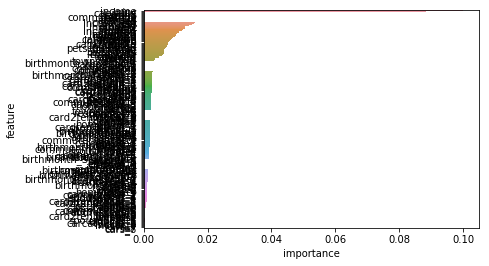

In [53]:
#getting features and there importance , to slect top 30 features
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [465]:
#Exporting Data into Excel so as to select top 30 important features 
pd.DataFrame(feature_rank).to_csv('abc.csv')

In [55]:
#List of top 30 important features
columns_new = ['lninc',
'carvalue',
'card_3',
'debtinc',
'commutetime',
'hourstv',
'card_2',
'card_4',
'address',
'creddebt',
'ed',
'age',
'employ',
'lncardmon',
'lnothdebt',
'pets',
'tollmon',
'tollten',
'lncardten',
'spoused',
'lnlongmon',
'cardmon',
'tenure',
'cardtenure',
'card2tenure',
'equipten',
'lnlongten',
'card_5',
'equipmon',
'commute']


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
features = "+".join(Credit.columns.difference(["ln_Total_Spend"]))
y,X = dmatrices('ln_Total_Spend~lninc +carvalue	 +card_3	 +debtinc	 +commutetime	 +hourstv	 +card_2	 +card_4	 +address	 +creddebt	 +ed	 +age	 +employ	 +lncardmon	 +lnothdebt	 +pets	 +tollmon	 +tollten	 +lncardten	 +spoused	 +lnlongmon	 +cardmon	 +tenure	 +cardtenure	 +card2tenure	 +equipten	 +lnlongten	 +card_5	 +equipmon	 +commute'
,Credit,return_type='dataframe')


In [57]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [58]:
vif.round(1)

,VIF Factor,features
0,314.5,Intercept
1,6.2,lninc
2,3.0,carvalue
3,1.7,card_3
4,3.8,debtinc
5,1.0,commutetime
6,1.0,hourstv
7,1.8,card_2
8,1.7,card_4
9,3.7,address


In [88]:
# features list after dropping features which have VIF more than 10
New_credit =   Credit[['lninc','carvalue','card_3',
'debtinc',
'commutetime',
'hourstv',
'card_2',
'card_4',
'address',
'creddebt',
'ed',
'age',
'employ',
'lncardmon',
'lnothdebt',
'pets',
'tollmon',
'tollten',
'lncardten',
'spoused',
'lnlongmon',
'cardmon',
'equipten',
'card_5',
'equipmon',
'commute','ln_Total_Spend']]

## Re-Building the model with top best features

In [89]:
feature_columns = New_credit.columns.difference(['ln_Total_Spend'])

In [90]:
train_X, test_X, train_y, test_y = train_test_split( New_credit[feature_columns],
                                                  New_credit['ln_Total_Spend'],
                                                  test_size = 0.3,
                                                  random_state = 42 )

In [91]:
train_X.columns

Index(['address', 'age', 'card_2', 'card_3', 'card_4', 'card_5', 'cardmon',
       'carvalue', 'commute', 'commutetime', 'creddebt', 'debtinc', 'ed',
       'employ', 'equipmon', 'equipten', 'hourstv', 'lncardmon', 'lncardten',
       'lninc', 'lnlongmon', 'lnothdebt', 'pets', 'spoused', 'tollmon',
       'tollten'],
      dtype='object')

In [92]:
train_X.shape

(3500, 26)

In [93]:
train_y.shape

(3500,)

In [94]:
import statsmodels.api as sm
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()  

In [95]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_Total_Spend   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.72
Date:                Sat, 13 Jul 2019   Prob (F-statistic):          5.45e-224
Time:                        23:55:37   Log-Likelihood:                -3008.5
No. Observations:                3500   AIC:                             6071.
Df Residuals:                    3473   BIC:                             6237.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.1391      0.170     30.204      

In [96]:
#Getting the list of P values so as to drop P values greater than 0.5
#dir(lm)
lm.pvalues

const          3.799393e-178
address         5.620584e-01
age             6.599370e-01
card_2          5.076797e-71
card_3          1.131648e-70
card_4          2.711253e-88
card_5          6.375891e-21
cardmon         7.088035e-01
carvalue        5.299242e-01
commute         9.382430e-01
commutetime     4.679623e-01
creddebt        5.764866e-01
debtinc         8.424192e-01
ed              4.034467e-01
employ          3.036395e-01
equipmon        6.120147e-01
equipten        4.468710e-01
hourstv         7.032388e-01
lncardmon       8.318277e-01
lncardten       3.909700e-01
lninc           5.489628e-33
lnlongmon       5.751439e-01
lnothdebt       6.614806e-01
pets            6.083063e-01
spoused         2.271642e-01
tollmon         3.388575e-02
tollten         5.750557e-02
dtype: float64

In [97]:
feature_columns

Index(['address', 'age', 'card_2', 'card_3', 'card_4', 'card_5', 'cardmon',
       'carvalue', 'commute', 'commutetime', 'creddebt', 'debtinc', 'ed',
       'employ', 'equipmon', 'equipten', 'hourstv', 'lncardmon', 'lncardten',
       'lninc', 'lnlongmon', 'lnothdebt', 'pets', 'spoused', 'tollmon',
       'tollten'],
      dtype='object')

In [98]:
cols = list(feature_columns)
New_credit[cols].head()
len(cols)

26

In [99]:
train_X, test_X, train_y, test_y = train_test_split( New_credit[feature_columns],
                                                  New_credit['ln_Total_Spend'],
                                                  test_size = 0.3,
                                                  random_state = 42 )

In [100]:
train_X.shape

(3500, 26)

In [101]:
train_y.shape

(3500,)

In [102]:
len(train_y)

3500

In [103]:
#for loop for dropping p values greater than 5% and re building te model to get the last list of features 
#which do not have p value greater than 5% while rebuilding model

cols = list(feature_columns)
pmax = 1
while (len(cols)>0):
    p= []
    train_X = train_X[cols]
    train_X = sm.add_constant(train_X)
    lm = sm.OLS(train_y,train_X).fit()
    p = pd.Series(lm.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['address', 'card_2', 'card_3', 'card_4', 'card_5', 'lninc']


In [104]:
train_y.head()

1840    5.750475
2115    6.639889
4437    6.096027
1146    5.158078
2486    5.401009
Name: ln_Total_Spend, dtype: float64

In [105]:
train_X = train_X[selected_features_BE]
train_X = sm.add_constant(train_X)
train_X.head()

,const,address,card_2,card_3,card_4,card_5,lninc
1840,1.0,7,1,0,0,0,3.367296
2115,1.0,17,0,0,1,0,4.983607
4437,1.0,5,0,0,1,0,2.397895
1146,1.0,13,0,1,0,0,3.850148
2486,1.0,33,0,1,0,0,3.891820


In [106]:
lm = sm.OLS(train_y,train_X).fit()

In [107]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_Total_Spend   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sat, 13 Jul 2019   Prob (F-statistic):          6.16e-241
Time:                        23:55:50   Log-Likelihood:                -3015.4
No. Observations:                3500   AIC:                             6045.
Df Residuals:                    3493   BIC:                             6088.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1273      0.055     93.531      0.0

In [109]:
test_X =test_X[selected_features_BE]

In [114]:
test_X.shape

(1500, 6)

In [115]:
test_y.shape

(1500,)

In [ ]:
#Comparing Errors to investigate if our model is under fitting or over fitting

In [117]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print ('MSE:', metrics.mean_squared_error(test_y, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.4407398532660935
MSE: 0.3206204037269041
RMSE: 0.5662335240224691


In [118]:
#Predicted y for train data
y_pred_dev = lm.predict(train_X)

In [119]:

print ('MAE:', metrics.mean_absolute_error(train_y, y_pred_dev))
print ('MSE:', metrics.mean_squared_error(train_y, y_pred_dev))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_dev)))

MAE: 0.439775642627292
MSE: 0.32798160432977325
RMSE: 0.5726967821891208


# Conclusion




## Since from above scenarios(MAE,MSE,RMSE) and model, we identify that our model is neither underfitting nor over fitting ,Since we are getting an optimal model

## From above model we predict that the Card spent is directly dependent on the type of card,income and address.


## Income is our major driver which defines the total card spent. and the Card_1 (American_Express) that we dropped also a driver in defining card spent. and we predict that the person which sticks to same address over years also decrease card spent 

### Other Miscelleaneous Coding

In [123]:
feature_columns_1 = Credit.columns.difference(['ln_Total_Spend'])

In [124]:
train_X, test_X, train_y, test_y = train_test_split( Credit[feature_columns_1],
                                                  Credit['ln_Total_Spend'],
                                                  test_size = 0.3,
                                                  random_state = 42 )

In [125]:

radm_clf = RandomForestRegressor(oob_score=True,n_estimators=100 )
radm_clf.fit( train_X, train_y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [134]:
#Use the forest's predict method on the test data
predictions = radm_clf.predict(test_X)
# Calculate the absolute errors
errors = abs(predictions - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))


Mean Absolute Error: 0.44869051705877966


In [135]:
#Use the forest's predict method on the test data
predictions_train = radm_clf.predict(train_X)
# Calculate the absolute errors
errors_train = abs(predictions_train - train_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors_train))

Mean Absolute Error: 0.16938659554004373


In [145]:
# features list after dropping features which have VIF more than 10
New_credit_reg =   Credit[['lninc',
'carvalue',
'card_3',
'debtinc',
'commutetime',
'hourstv',
'card_2',
'card_4',
'address',
'creddebt',
'ed',
'age',
'employ',
'lncardmon',
'lnothdebt',
'pets',
'tollmon',
'tollten',
'lncardten',
'spoused',
'lnlongmon',
'cardmon',
'tenure',
'cardtenure',
'card2tenure',
'equipten',
'lnlongten',
'card_5',
'equipmon',
'commute','ln_Total_Spend']]

In [146]:
feature_columns_reg = New_credit_reg.columns.difference(['ln_Total_Spend'])

In [147]:
train_X, test_X, train_y, test_y = train_test_split( Credit[feature_columns_reg],
                                                  Credit['ln_Total_Spend'],
                                                  test_size = 0.3,
                                                  random_state = 42 )

In [149]:
radm_clf_reg = RandomForestRegressor(oob_score=True,n_estimators=100 )
radm_clf_reg.fit( train_X, train_y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [151]:
predictions_reg = radm_clf_reg.predict(test_X)

In [153]:
errors = abs(predictions_reg - test_y)

In [159]:
# Display the performance metrics
print('Mean Absolute Error:', np.mean(errors) )


Mean Absolute Error: 0.46162663368743695


In [160]:
mape = np.mean(100 * (errors / test_y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.97 %.
